In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from actor_critic import Agent as AC
from a2c import Agent as A2C

In [2]:
def plot_learning_curve(scores, x):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

### Actor Critic

In [3]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    n_games = 3001
    agent = AC(gamma=0.99, lr=0.0005, input_dims=(env.observation_space.shape),
                                n_actions=env.action_space.n, fc1_dims=256, fc2_dims=128)

    scores = []
    for i in range(n_games):
        done = False
        observation = env.reset()
        score = 0
        n = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.learn(observation, reward, observation_, done, n)
            observation = observation_
            n += 1
        
        scores.append(score)

        avg_score = np.mean(scores[-100:])
        print('episode ', i, 'score %.2f' % score,
                'average score %.2f' % avg_score)

episode  0 score 34.00 average score 34.00
episode  1 score 42.00 average score 38.00
episode  2 score 11.00 average score 29.00
episode  3 score 26.00 average score 28.25
episode  4 score 54.00 average score 33.40
episode  5 score 15.00 average score 30.33
episode  6 score 29.00 average score 30.14
episode  7 score 26.00 average score 29.62
episode  8 score 13.00 average score 27.78
episode  9 score 23.00 average score 27.30
episode  10 score 18.00 average score 26.45
episode  11 score 33.00 average score 27.00
episode  12 score 13.00 average score 25.92
episode  13 score 11.00 average score 24.86
episode  14 score 14.00 average score 24.13
episode  15 score 21.00 average score 23.94
episode  16 score 18.00 average score 23.59
episode  17 score 21.00 average score 23.44
episode  18 score 49.00 average score 24.79
episode  19 score 15.00 average score 24.30
episode  20 score 51.00 average score 25.57
episode  21 score 29.00 average score 25.73
episode  22 score 22.00 average score 25.5

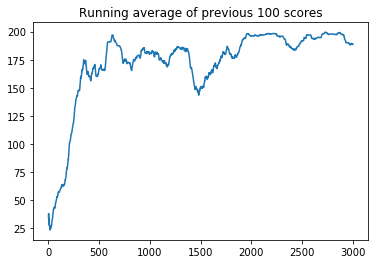

In [4]:
x = [i+1 for i in range(len(scores))]
plot_learning_curve(scores, x)

### A2C

In [5]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    n_games = 3001
    agent = A2C(gamma=0.99, lr=0.0005, input_dims=(env.observation_space.shape),
                                n_actions=env.action_space.n, fc1_dims=256, fc2_dims=128)

    scores = []
    for i in range(n_games):
        done = False
        observation = env.reset()
        score = 0
        n = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.learn(observation, reward, observation_, done, n)
            observation = observation_
            n += 1
        
        scores.append(score)

        avg_score = np.mean(scores[-100:])
        print('episode ', i, 'score %.2f' % score,
                'average score %.2f' % avg_score)

episode  0 score 25.00 average score 25.00
episode  1 score 28.00 average score 26.50
episode  2 score 22.00 average score 25.00
episode  3 score 17.00 average score 23.00
episode  4 score 28.00 average score 24.00
episode  5 score 66.00 average score 31.00
episode  6 score 34.00 average score 31.43
episode  7 score 21.00 average score 30.12
episode  8 score 16.00 average score 28.56
episode  9 score 24.00 average score 28.10
episode  10 score 38.00 average score 29.00
episode  11 score 33.00 average score 29.33
episode  12 score 16.00 average score 28.31
episode  13 score 28.00 average score 28.29
episode  14 score 76.00 average score 31.47
episode  15 score 19.00 average score 30.69
episode  16 score 17.00 average score 29.88
episode  17 score 41.00 average score 30.50
episode  18 score 39.00 average score 30.95
episode  19 score 12.00 average score 30.00
episode  20 score 22.00 average score 29.62
episode  21 score 19.00 average score 29.14
episode  22 score 27.00 average score 29.0

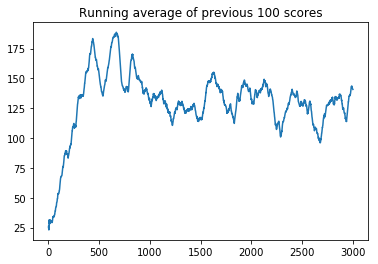

In [6]:
x = [i+1 for i in range(len(scores))]
plot_learning_curve(scores, x)